In [3]:
#Health Prediction Using Smoking Data 
#Importing Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skt
import seaborn as sns


In [4]:
#Loading Dataset
df= pd.read_csv('smoking_health_data_final.csv')

In [5]:
 df.head()

,age,sex,current_smoker,heart_rate,blood_pressure,cigs_per_day,chol
0,54,male,yes,95,110/72,NaN,219.0
1,45,male,yes,64,121/72,NaN,248.0
2,58,male,yes,81,127.5/76,NaN,235.0
3,42,male,yes,90,122.5/80,NaN,225.0
4,42,male,yes,62,119/80,NaN,226.0


In [6]:
 df.isnull().sum().sum()

21

In [7]:
 df.isnull().sum()

age                0
sex                0
current_smoker     0
heart_rate         0
blood_pressure     0
cigs_per_day      14
chol               7
dtype: int64

In [8]:
#Handling Missing Values
df['cigs_per_day'].fillna(df['cigs_per_day'].mean(),inplace=True)
df['chol'].fillna(df['chol'].ffill(),inplace=True)

In [9]:
df.isnull().sum() 

age               0
sex               0
current_smoker    0
heart_rate        0
blood_pressure    0
cigs_per_day      0
chol              0
dtype: int64

In [10]:
df.head()

,age,sex,current_smoker,heart_rate,blood_pressure,cigs_per_day,chol
0,54,male,yes,95,110/72,9.168554,219.0
1,45,male,yes,64,121/72,9.168554,248.0
2,58,male,yes,81,127.5/76,9.168554,235.0
3,42,male,yes,90,122.5/80,9.168554,225.0
4,42,male,yes,62,119/80,9.168554,226.0


In [11]:
#Modifying Data According To Our Needs
df.describe()

,age,heart_rate,cigs_per_day,chol
count,3900.000000,3900.000000,3900.000000,3900.000000
mean,49.537949,75.688974,9.168554,236.632821
std,8.559275,12.015376,12.016367,44.376465
min,32.000000,44.000000,0.000000,113.000000
25%,42.000000,68.000000,0.000000,206.000000
50%,49.000000,75.000000,0.000000,234.000000
75%,56.000000,82.000000,20.000000,263.000000
max,70.000000,143.000000,70.000000,696.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             3900 non-null   int64  
 1   sex             3900 non-null   object 
 2   current_smoker  3900 non-null   object 
 3   heart_rate      3900 non-null   int64  
 4   blood_pressure  3900 non-null   object 
 5   cigs_per_day    3900 non-null   float64
 6   chol            3900 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 213.4+ KB


In [13]:
#Seperating The blood_pressure Column Into High And Low Blood Pressure Respectively 
df[['high_bp', 'low_bp']] = df['blood_pressure'].str.split('/', expand=True)


In [14]:
#Changing The Data Types Of New Created Columns
df['high_bp'] = pd.to_numeric(df['high_bp'])
df['low_bp'] = pd.to_numeric(df['low_bp'])

In [15]:
df.describe()

,age,heart_rate,cigs_per_day,chol,high_bp,low_bp
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,49.537949,75.688974,9.168554,236.632821,132.395385,82.987179
std,8.559275,12.015376,12.016367,44.376465,21.976335,11.918623
min,32.000000,44.000000,0.000000,113.000000,83.500000,48.000000
25%,42.000000,68.000000,0.000000,206.000000,117.000000,75.000000
50%,49.000000,75.000000,0.000000,234.000000,128.000000,82.000000
75%,56.000000,82.000000,20.000000,263.000000,144.000000,90.000000
max,70.000000,143.000000,70.000000,696.000000,295.000000,142.500000


In [16]:
df.dtypes

age                 int64
sex                object
current_smoker     object
heart_rate          int64
blood_pressure     object
cigs_per_day      float64
chol              float64
high_bp           float64
low_bp            float64
dtype: object

Text(0.5, 1.0, 'Boxplot For Multiple Columns')

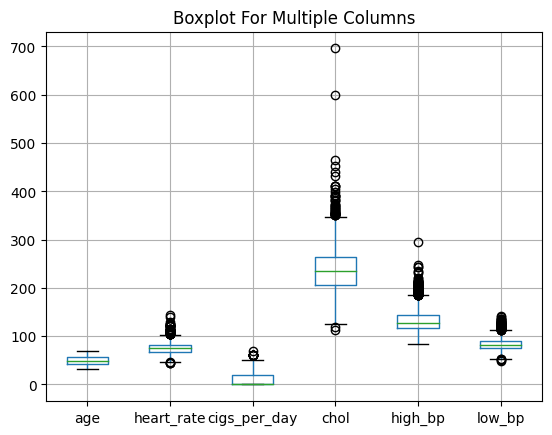

In [17]:
#Boxplot Graph For Outlier PLotting
df.boxplot()
plt.title('Boxplot For Multiple Columns')

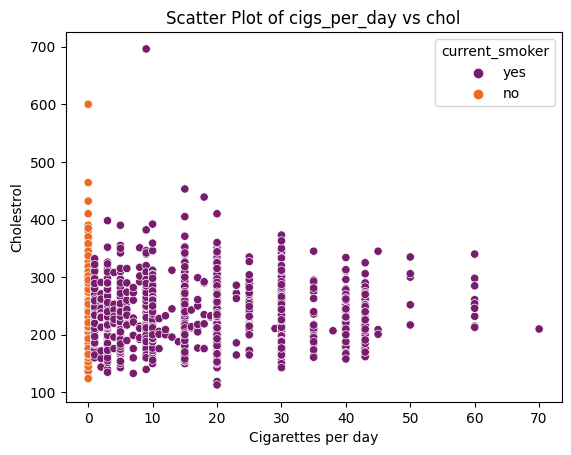

In [18]:
#ScatterPlot For Outlier Plotting
sns.scatterplot(x = 'cigs_per_day', y = 'chol', hue = 'current_smoker' , palette = 'inferno',data = df)
plt.title('Scatter Plot of cigs_per_day vs chol')
plt.xlabel('Cigarettes per day')
plt.ylabel('Cholestrol')
plt.show()

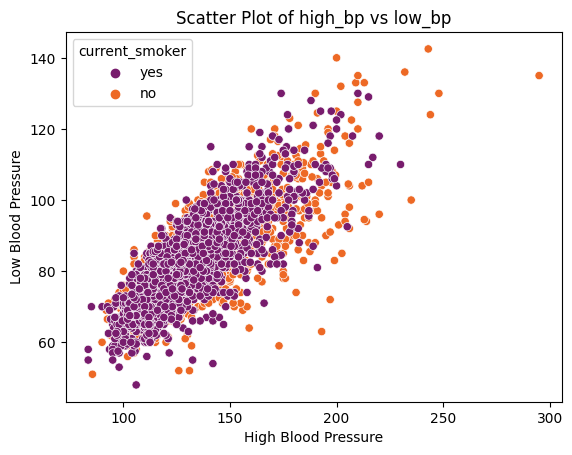

In [19]:
sns.scatterplot(x = 'high_bp', y = 'low_bp', hue = 'current_smoker' , palette = 'inferno',data = df)
plt.title('Scatter Plot of high_bp vs low_bp')
plt.xlabel('High Blood Pressure')
plt.ylabel('Low Blood Pressure')
plt.show()

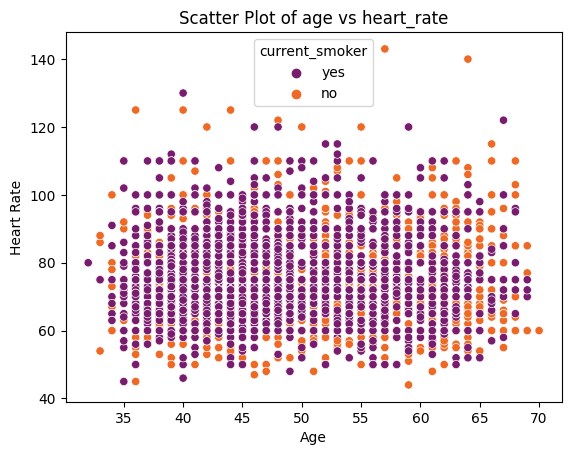

In [20]:
sns.scatterplot(x = 'age', y = 'heart_rate', hue = 'current_smoker' , palette = 'inferno',data = df)
plt.title('Scatter Plot of age vs heart_rate')
plt.xlabel('Age')
plt.ylabel('Heart Rate')
plt.show()

In [21]:
heart_disease_criteria = (df['heart_rate'] > 100) | (df['chol'] > 200)
df['has_heart_disease'] = heart_disease_criteria.astype(int)
df.head()

,age,sex,current_smoker,heart_rate,blood_pressure,cigs_per_day,chol,high_bp,low_bp,has_heart_disease
0,54,male,yes,95,110/72,9.168554,219.0,110.0,72.0,1
1,45,male,yes,64,121/72,9.168554,248.0,121.0,72.0,1
2,58,male,yes,81,127.5/76,9.168554,235.0,127.5,76.0,1
3,42,male,yes,90,122.5/80,9.168554,225.0,122.5,80.0,1
4,42,male,yes,62,119/80,9.168554,226.0,119.0,80.0,1


In [22]:
#Applying Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report


In [23]:
scaler = StandardScaler()
numerical_cols = ['heart_rate', 'cigs_per_day', 'chol', 'high_bp', 'low_bp']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [24]:
df = pd.get_dummies(df, columns=['sex', 'current_smoker'])


In [25]:
df['sex_female'] = df['sex_female'].astype(int)
df['sex_male'] = df['sex_male'].astype(int)
df['current_smoker_no'] = df['current_smoker_no'].astype(int)
df['current_smoker_yes'] = df['current_smoker_yes'].astype(int)

In [61]:
X = df.drop(columns=['blood_pressure','has_heart_disease'])
y = df['has_heart_disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [62]:
model = LogisticRegression(max_iter=1000, solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [63]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9794871794871794
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       157
           1       0.99      0.99      0.99       623

    accuracy                           0.98       780
   macro avg       0.97      0.97      0.97       780
weighted avg       0.98      0.98      0.98       780

